# Wooing my girlfriend's family with data

## Introduction


I recently started dating my current girlfriend and participated in her extended family's march madness pool. They have been running this pool for quite sometime and as a result, my girlfriend was bragging about how she was ranked in the top 5 for all time points.  Being the competitor I am and armed with some code, I set out to knock her down a peg through some good old fashion data analysis.  As a result, I sought to figure out who was the actual best march madness player in the extended family and friends.  

First let's load all the needed libraries.

In [1]:
import pandas as pd 
import numpy as np

#Making plots look nice
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

#For displaying table next to each other
from IPython.display import display, HTML

Next, I downloaded the data into a spreadsheet which we can load into a dataframe.  While certainly scraping the data would have been the preferred method to show here, I would like to protect the names of the people in this data.  Thus, I have scrapped the data and changed the names to fake names by using [this](https://pypi.org/project/Faker/) library.  While all the points data is the same, all the names have been changed.  For the people on the original table, I have created a separate report that they can look at internally.  While I certainly do not want to get on a pedestal, I feel that anatomizing and protecting people's data should be taken seriously.  

In [2]:
web_table = pd.read_excel('Web_table_Fake_Names.xlsx')

## Exploratory Data Analysis 

As in good data analysis let's get a feel for what we are working with through some simple commands.

In [3]:
web_table.head()

,Place,Player,Total Pts,2018 Pts,2017 Pts,2016 Pts,2015 Pts,2014 Pts,2013 Pts,2012 Pts,2011 Pts,2010 Pts,2009 Pts,2008 Pts,2007 Pts,2006 Pts,2005 Pts,2004 Pts,2003 Pts,2002 Pts
0,1,Tammy Dean,4986,269.0,294.0,245.0,301.0,250.0,322.0,342.0,225.0,233.0,308.0,362.0,387.0,242.0,288.0,263.0,261.0,394.0
1,2,Michael Torres,4978,209.0,309.0,273.0,380.0,302.0,220.0,339.0,248.0,206.0,398.0,344.0,328.0,248.0,293.0,274.0,291.0,316.0
2,3,Katherine Barton,4947,229.0,259.0,266.0,268.0,295.0,210.0,346.0,203.0,287.0,303.0,318.0,480.0,257.0,356.0,254.0,325.0,291.0
3,4,Carrie Oneal,4826,310.0,369.0,295.0,355.0,300.0,327.0,352.0,198.0,291.0,323.0,315.0,341.0,210.0,332.0,254.0,254.0,NaN
4,5,Kevin Evans,4812,340.0,253.0,318.0,277.0,229.0,312.0,430.0,183.0,305.0,334.0,316.0,271.0,217.0,255.0,267.0,256.0,249.0


Okay it looks like we get the name, the overall rank in total points, and then the points scored in each year.  Looking at "Carrie Oneal" in 2002 Pts there appears to be a "NaN."  I am pretty sure this is missing data from a year that the player didn't participate.  Because this is ranked by overall points then looking at the bottom of the dataframe should have a bunch of "NaNs" since those who haven't played a lot should have a low point total.  So let's look at that really quick.

In [4]:
web_table.tail()

,Place,Player,Total Pts,2018 Pts,2017 Pts,2016 Pts,2015 Pts,2014 Pts,2013 Pts,2012 Pts,2011 Pts,2010 Pts,2009 Pts,2008 Pts,2007 Pts,2006 Pts,2005 Pts,2004 Pts,2003 Pts,2002 Pts
584,585,Timothy Dixon,141,NaN,NaN,141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,586,Diana Flores,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.0,NaN,NaN,NaN,NaN,NaN
586,587,Kari Martinez,110,NaN,NaN,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587,588,Brett Braun,102,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588,589,Brenda Carter DVM,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahh just as we guessed, those at the lowest scores didn't participate in a lot of the years. Let's also get a feel for the spread in the points every year. Not only can we look at the statistics but can use a few lines to graphically look at the data. 

In [5]:
web_table.describe()

,Place,Total Pts,2018 Pts,2017 Pts,2016 Pts,2015 Pts,2014 Pts,2013 Pts,2012 Pts,2011 Pts,2010 Pts,2009 Pts,2008 Pts,2007 Pts,2006 Pts,2005 Pts,2004 Pts,2003 Pts,2002 Pts
count,589.000000,589.000000,194.000000,213.000000,209.000000,194.000000,206.000000,215.000000,232.000000,220.000000,216.000000,207.000000,192.000000,190.000000,136.000000,99.000000,65.000000,56.000000,29.000000
mean,295.000000,1317.266553,252.891753,268.713615,259.014354,301.262887,243.446602,259.758140,305.974138,217.909091,236.134259,313.705314,293.156250,332.747368,226.227941,282.141414,256.107692,245.464286,259.586207
std,170.173931,1307.451825,53.808754,56.045194,44.513662,54.357652,35.166289,54.889329,57.006183,31.444536,43.862847,57.590074,57.569412,74.310868,32.130052,63.032063,46.172950,47.462890,57.430403
min,1.000000,99.000000,94.000000,56.000000,136.000000,67.000000,86.000000,110.000000,116.000000,70.000000,98.000000,75.000000,19.000000,38.000000,96.000000,83.000000,128.000000,82.000000,111.000000
25%,148.000000,296.000000,212.250000,228.000000,233.000000,268.000000,226.250000,215.000000,260.500000,198.000000,206.000000,277.500000,261.750000,293.500000,208.750000,247.000000,231.000000,219.250000,234.000000
50%,295.000000,617.000000,247.000000,260.000000,262.000000,299.000000,244.000000,259.000000,306.000000,213.500000,233.000000,310.000000,298.000000,341.000000,227.000000,284.000000,254.000000,251.000000,262.000000
75%,442.000000,2176.000000,294.500000,303.000000,288.000000,338.000000,265.500000,304.000000,349.000000,233.250000,265.000000,357.500000,328.250000,383.750000,244.250000,329.000000,276.000000,270.500000,291.000000
max,589.000000,4986.000000,401.000000,471.000000,403.000000,448.000000,322.000000,397.000000,440.000000,362.000000,371.000000,447.000000,409.000000,480.000000,327.000000,431.000000,390.000000,345.000000,394.000000


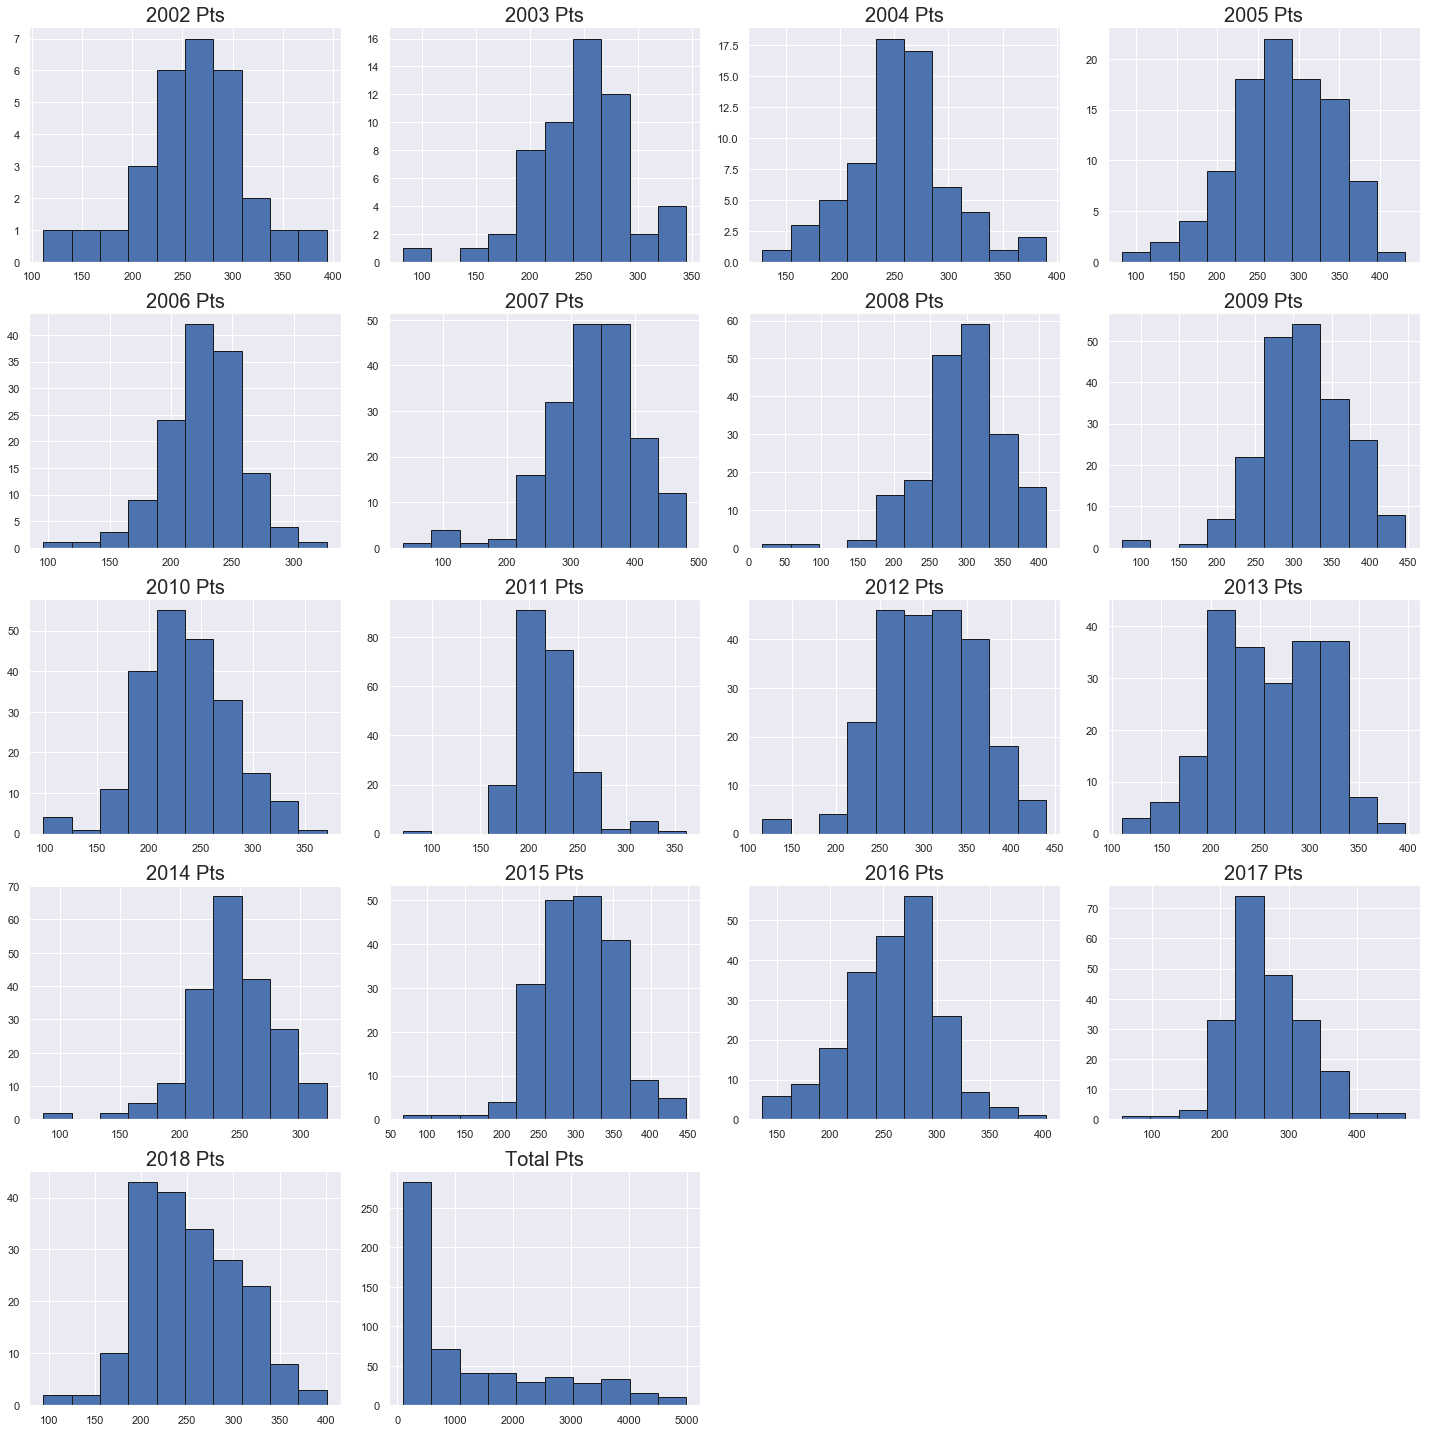

In [6]:
histo_plot  = web_table.iloc[:,2:]

fig = histo_plot.hist(figsize = (20,20), ec = 'k')
[x.title.set_size(20) for x in fig.ravel()]
plt.tight_layout()
plt.show()

We can see visually that the points per year tend to cluster between 200 and 350.  There are years that have a lower average (like 2006) and max points compared to years like 2012 with a higher average and max points.  We'll have to keep this in mind when we start defining metrics for "who is the best at march madness".  

Furthermore, while histograms are fantastic for get a spread in the data, it can be prone to binning bias.  If we want to visualize every point and still compare the distributions, it can get tricky with tons of data.  Fortunately, “violinplot” from the seaborn library can come to our rescue.  These types of figures plot each data point as a dot on the line and then make the curve wider or skinnier depending on the if there are other points near it.  For example, if a bunch of people scored around 250 pts one year, the curve will be fatter there compared to only a few people scoring greater than 350 resulting in a skinnier part of the curve.  Moreover, we can see the few outliers that might be overrepresented in a histogram binning method.
   
I am only going to look at the last 7 years or so because plotting all the data at once makes it hard to read the plots in one graph.  Finally, I'll plot the "Total pts" column on a different plot since it has much larger numbers than the points every year.


In [7]:
total_pts_violin = histo_plot['Total Pts']
violing_plot = histo_plot.drop(['Total Pts'], axis = 1)

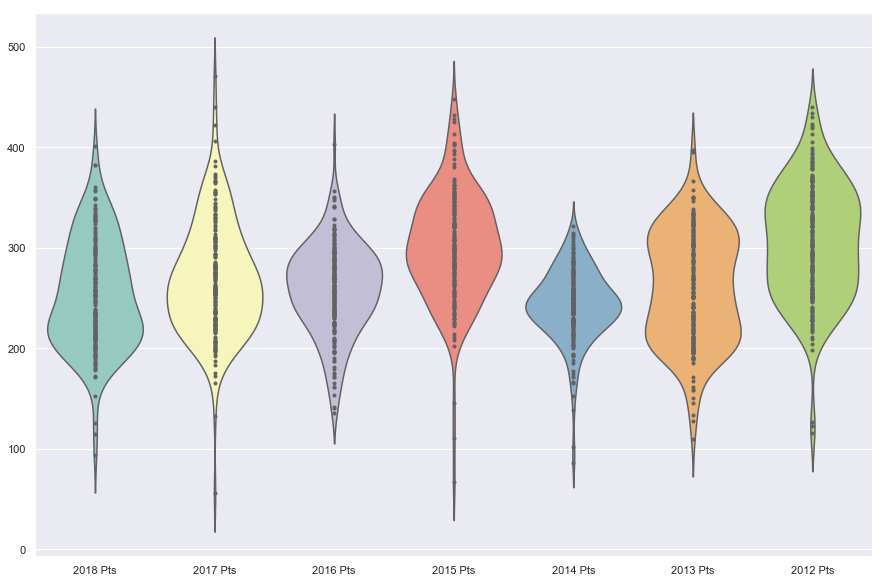

In [8]:
violing_plot = violing_plot.iloc[:, :7] # Only grab the last 7 years

fig2, ax = plt.subplots()
sns.violinplot(data = violing_plot,  inner = 'points', scale="width", palette="Set3")
fig2.set_size_inches(15, 10)

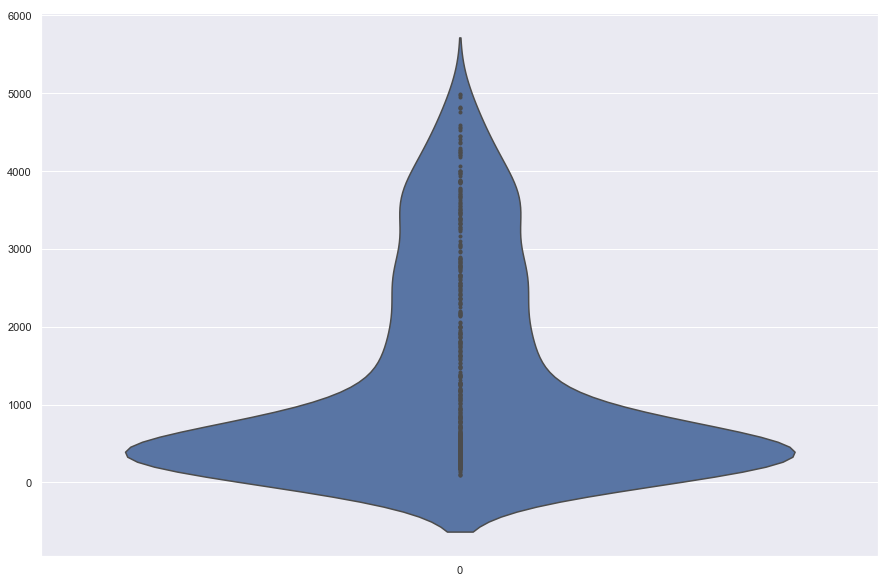

In [9]:
fig3, ax1 = plt.subplots()
sns.violinplot(data = total_pts_violin,  inner = 'points')
fig3.set_size_inches(15, 10)

Alright cool we can now visually see where the clustering is.  As noted, there seems to be a large amount of people that fall in between 200 pts and 350 pts (fatter part of graphs) every year with a few outliers (skinnier parts).  For the most part, every year seems to follow roughly the same distribution.  Finally, in the total points plot, there seems to be a great number of people between the 0 and 1000 point range meaning the average person in this dataset has only participated between 3-5 years, while the higher ones are probably the people who have just played a bunch (like my girlfriend). 

In [10]:
print(web_table['Player'].head())

0          Tammy Dean
1      Michael Torres
2    Katherine Barton
3        Carrie Oneal
4         Kevin Evans
Name: Player, dtype: object


## Removing the Legacy Bias

Cool.  Now that we have that sorted out and a brief overview of the composition of the data, let's figure out what metric we want to use to declare the "best player" in March madness.  My initial inkling is to look at points per year as that would remove the advantage of people who just have been playing longer.  Thus, we need a way to count the number of years each player has participate.  Musing around, it occurs to me that we can use the NaNs in this dataset to our advantage as that signals the person didn't play that year.  Simply counting up the total NaNs in each players row and subtracting that sum from the total years the pool has been going on gives us the number of years each player individually has participated. 

In [11]:
# Here were using the iloc call to avoid counting the place, player, and total pts columns.
#Then finding the width of the call using the shape[1]
total_years_pool = web_table.iloc[:,3:].shape[1]
web_table['Times Played'] = total_years_pool - web_table.isnull().sum(axis = 1)
print(web_table.head())

   Place            Player  Total Pts  2018 Pts  2017 Pts  2016 Pts  2015 Pts  \
0      1        Tammy Dean       4986     269.0     294.0     245.0     301.0   
1      2    Michael Torres       4978     209.0     309.0     273.0     380.0   
2      3  Katherine Barton       4947     229.0     259.0     266.0     268.0   
3      4      Carrie Oneal       4826     310.0     369.0     295.0     355.0   
4      5       Kevin Evans       4812     340.0     253.0     318.0     277.0   

   2014 Pts  2013 Pts  2012 Pts      ...       2010 Pts  2009 Pts  2008 Pts  \
0     250.0     322.0     342.0      ...          233.0     308.0     362.0   
1     302.0     220.0     339.0      ...          206.0     398.0     344.0   
2     295.0     210.0     346.0      ...          287.0     303.0     318.0   
3     300.0     327.0     352.0      ...          291.0     323.0     315.0   
4     229.0     312.0     430.0      ...          305.0     334.0     316.0   

   2007 Pts  2006 Pts  2005 Pts  2004 

One thing that does occur to me is that people who have participated only a few years might have an advantage in this points per year metric.  Thus, let's remove everyone who has participated less than 5 years.  As famous basketball player Shaq recently said during a game I was watching, "Superstars do well year after year."  We then can calculate the points per year (PPY) by dividing the total points by the times played column.

In [12]:
web_table = web_table[web_table['Times Played'] >= 5]
web_table['PPY'] = web_table['Total Pts']/web_table['Times Played']

We can now just grab columns were interested in such as the 'players' or 'times played' and then sort them based on the points per year metric. 

In [13]:
d = {'Player': web_table['Player'], 'Total Points': web_table['Total Pts'], 'Times Played': web_table['Times Played'], 'Points per Year': web_table['PPY']  }
Total_PPY_df = pd.DataFrame(data = d)
Total_PPY_df = Total_PPY_df.sort_values(by = ['Points per Year'], ascending = False)
Total_PPY_df.head()

,Player,Total Points,Times Played,Points per Year
191,Janice Johnson,1595,5,319.000000
193,Crystal Green,1577,5,315.400000
66,Richard Curry,3444,11,313.090909
166,John Riddle,1875,6,312.500000
127,Nicholas Ellis,2498,8,312.250000


Congrats to Janice, Crystal, Richard, John, and Nicholas for making the top five.  It would be nice, however, to create a 'place' column like we had before.  I feel like we might look at other metrics so let's write a quick re-usable function that can automatically give us the rank of a sorted table.

In [14]:
def ReRank(data_table, col_name = 'Rank'):
    '''
        Input:
            data_table - Sorted data table (as dataframe).
            col_name - The metric we are ranking on.
        Output:
            Same data table as input dataframe with additional "Rank" column
    '''
    if 'Place' in data_table:
        data_table = data_table.drop('Place', axis = 1)
    data_table = data_table.reset_index(drop = True).reset_index()
    data_table = data_table.rename(index=str, columns={"index": str(col_name) + ' Place'})
    data_table[str(col_name) + ' Place'] = data_table[str(col_name) + ' Place'] + 1
    return data_table

In [15]:
Total_PPY_df = ReRank(Total_PPY_df, 'PPY')

Let's compare this top 10 to the previous "Top Ten."  One thing to note here is that when we pring out these tables we are also getting the index.  Let's write a quick function that removes the index and makes our tables better looking.


In [16]:
def show_nice_table(df_to_show):
    return display(HTML(df_to_show.to_html(index=False)))

In [17]:
show_nice_table(Total_PPY_df.head(10))
show_nice_table(web_table[['Place', 'Player', 'Total Pts']].head(10))

PPY Place,Player,Total Points,Times Played,Points per Year
1,Janice Johnson,1595,5,319.000000
2,Crystal Green,1577,5,315.400000
3,Richard Curry,3444,11,313.090909
4,John Riddle,1875,6,312.500000
5,Nicholas Ellis,2498,8,312.250000
6,Derrick Mcdonald,2152,7,307.428571
7,Angel Chavez,1531,5,306.200000
8,Crystal Anderson,3323,11,302.090909
9,Elizabeth Evans,3020,10,302.000000
10,Carrie Oneal,4826,16,301.625000


Place,Player,Total Pts
1,Tammy Dean,4986
2,Michael Torres,4978
3,Katherine Barton,4947
4,Carrie Oneal,4826
5,Kevin Evans,4812
6,Christina Cabrera,4808
7,Patrick Jackson,4763
8,Leslie Patton,4585
9,Angel Owen,4565
10,Tara Montes,4553


Wow, only "Carrie Oneal" appears in the top ten of both metrics but more interestingly my girlfriend is not in the top 10 points per year.  For those of you who are curious, here's the whole table.

In [18]:
pd.set_option('display.max_rows', 1000)
show_nice_table(Total_PPY_df) 

PPY Place,Player,Total Points,Times Played,Points per Year
1,Janice Johnson,1595,5,319.000000
2,Crystal Green,1577,5,315.400000
3,Richard Curry,3444,11,313.090909
4,John Riddle,1875,6,312.500000
5,Nicholas Ellis,2498,8,312.250000
6,Derrick Mcdonald,2152,7,307.428571
7,Angel Chavez,1531,5,306.200000
8,Crystal Anderson,3323,11,302.090909
9,Elizabeth Evans,3020,10,302.000000
10,Carrie Oneal,4826,16,301.625000


## Handling the Parent Bias

When I showed this initial result to my girlfriend, she quickly pointed out that for a lot of those early years she was rather young and employed the "which mascot is cooler" method when filling out her bracket.  Thus, purely taking the points per year method is skewed towards the older generation who made more informed picks when this pool was started.  Another way we can look at it is to first sort on the years played and then the points per year. Such a sort would get at that "consistently great" idea we are trying to find.

In [19]:
Total_Year_PPY = Total_PPY_df.drop(['PPY Place'], axis = 1)

In [20]:
Total_Year_PPY = Total_Year_PPY.sort_values(by = ['Times Played', 'Points per Year'], ascending = False)
Total_Year_PPY = ReRank(Total_Year_PPY)

Rather than scrolling up and down to compare the lists let's do some quick editing of how python displays printed tables.  This way we can display the tables side by side.

In [21]:
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [22]:
show_nice_table(web_table[['Place','Player', 'Total Pts', 'Times Played', 'PPY']].head(10))
show_nice_table(Total_Year_PPY.head(10))

Place,Player,Total Pts,Times Played,PPY
1,Tammy Dean,4986,17,293.294118
2,Michael Torres,4978,17,292.823529
3,Katherine Barton,4947,17,291.000000
4,Carrie Oneal,4826,16,301.625000
5,Kevin Evans,4812,17,283.058824
6,Christina Cabrera,4808,17,282.823529
7,Patrick Jackson,4763,17,280.176471
8,Leslie Patton,4585,17,269.705882
9,Angel Owen,4565,16,285.312500
10,Tara Montes,4553,17,267.823529


Rank Place,Player,Total Points,Times Played,Points per Year
1,Tammy Dean,4986,17,293.294118
2,Michael Torres,4978,17,292.823529
3,Katherine Barton,4947,17,291.000000
4,Kevin Evans,4812,17,283.058824
5,Christina Cabrera,4808,17,282.823529
6,Patrick Jackson,4763,17,280.176471
7,Leslie Patton,4585,17,269.705882
8,Tara Montes,4553,17,267.823529
9,Marc Stuart DVM,4530,17,266.470588
10,Robin Snyder,4269,17,251.117647


As noted the table on the left is ranked by total career points while the table on the right is first sorted by number of times played and then points per year.  One thing that caught my eye is that these tables are very similar, however, 'Carrie Oneal' seems to be missing from the table on the right.  Let's see if we can find her. 

In [36]:
show_nice_table(Total_Year_PPY.head(15))

Rank Place,Player,Total Points,Times Played,Points per Year
1,Tammy Dean,4986,17,293.294118
2,Michael Torres,4978,17,292.823529
3,Katherine Barton,4947,17,291.000000
4,Kevin Evans,4812,17,283.058824
5,Christina Cabrera,4808,17,282.823529
6,Patrick Jackson,4763,17,280.176471
7,Leslie Patton,4585,17,269.705882
8,Tara Montes,4553,17,267.823529
9,Marc Stuart DVM,4530,17,266.470588
10,Robin Snyder,4269,17,251.117647


Ahh, there she is at number 16.  She was dinged because he missed a year despite having a higher PPY than everyone in front of her.  Thus, sorting the table this way (first by years played and then points per year) probably isn't the best method as missing a few years (even one) causes a pretty far drop in the ranking.

Therefore, we need some way to rank everyone without skewing towards people who have had a chance to play for a long time or penalizing players who were younger.  My next inkling is to look at the last five years each individual has participated and then compute the points per year over that 5 year stretch.  Thus, this subsection captures a long stretch of data, doesn't penalize people who were younger when they started, and finally removes the bias of just playing for a long time.  Let's write a quick function that helps us find the average of a certain stat for the years we want to look at.  For example, in this case we can find the average 'points per year' for the past 5 times each person has played.  

In [24]:
def stat_x_years(year_df, num_year, rank_order = True,  stat = 'Rank'):
    '''
        Intakes DF that has Player, and then years in the colums with statistics for that year as rows
        Intakes number of years you want to go back 
        
        Outputs:
            Input data frame with average as additional colum
            Dataframe with Player, avg statistic, Rank according to that statistic
    '''
    col_string = 'Avg ' + stat +' of Last ' + str(num_year)+ ' yrs Played'
    avg_xyear = []
    for name in year_df['Player']:
        row_temp = year_df[year_df['Player'] == name]
        row_temp = row_temp[row_temp.columns[~row_temp.isnull().all()]]
        row_temp = row_temp.drop('Player', axis = 1)
        
        avg_xyear.append(np.mean(row_temp.iloc[0,:num_year]))
    
    year_df[col_string] = avg_xyear
    
    Avg_stat_Standings = year_df[['Player', col_string]]
    
    Avg_stat_Standings = Avg_stat_Standings.sort_values(by = [col_string], ascending = rank_order)
    Avg_stat_Standings = ReRank(Avg_stat_Standings, col_string)
    
    return year_df, Avg_stat_Standings

To make this analysis easier, we can drop the columns we created earlier so that we are only getting the player and their stats per year. We can than print out the average PPY for the past 5 years for each person and re-rank them according to this metric.  This table can be compared to the original "place." 

In [25]:
PPY_df = web_table.drop(['Place', 'Times Played', 'PPY', 'Total Pts'], axis = 1)
PPY_df, avg_ppy_rank = stat_x_years(PPY_df, 5, rank_order =  False, stat = 'PPY')

In [26]:
show_nice_table(avg_ppy_rank.head(10))
show_nice_table(web_table[['Place', 'Player', 'Total Pts']].head(10))

Avg PPY of Last 5 yrs Played Place,Player,Avg PPY of Last 5 yrs Played
1,John Riddle,329.0
2,Carrie Oneal,325.8
3,Anne Carpenter,320.6
4,Janice Johnson,319.0
5,Jonathan Jones,318.2
6,Crystal Green,315.4
7,Brian Jordan,311.6
8,Crystal Anderson,309.6
9,Daniel Gonzales,309.2
10,Kathy Mitchell,307.8


Place,Player,Total Pts
1,Tammy Dean,4986
2,Michael Torres,4978
3,Katherine Barton,4947
4,Carrie Oneal,4826
5,Kevin Evans,4812
6,Christina Cabrera,4808
7,Patrick Jackson,4763
8,Leslie Patton,4585
9,Angel Owen,4565
10,Tara Montes,4553


As we can see the only person in the top 10 of each is still Carrie Oneal.  I feel that this is one of the better metrics of determining who is the best in the pool as it avoids a lot of the data biases we discussed earlier. 

## Normalizing by Year

We could easily stop here and give the final ranking to above top ten, however, I want to recall some of our analysis from the exploratory data analysis. It was seen that most years had an points scored for each person between 200 and 350 with a few outlying years that spiked into the 400s.  Some background on the basketball tournament tells us that there are years where everything for the most part goes as expected (think 2008 where every number 1 seed main the final four) or everything goes "wrong" (Butler and VCU both double digit seeds make the final four).  Perhaps those in the top ten were able to ride the years where everyone scored very high because the tournament went "as planned."  To truly get at who has consistent greatness year after year, we can rank everyone in each respective year.  Thus, it won't matter if one year a lot of people scored low or high as everything will be contained in each year.  

To do so we need to construct a data table that will look at each 'year' column and rank everyone according to the points they scored.  We need to write a quick function that will re-rank each column once that points column is sorted.  

In [27]:
def ReRank_remove(data_table, col_name = 'Rank'):
    if col_name in data_table:
        data_table = data_table.drop([col_name], axis = 1)
    data_table = data_table.reset_index(drop = True).reset_index()
    data_table = data_table.rename(index=str, columns={"index": col_name})
    data_table[col_name] = data_table[col_name] + 1
    return data_table


Let's pick the years we want to look at and create a dataframe that we can append to as we iterate through each year. 

In [28]:
start_year = 2002
end_year = 2019
years = [x for x in reversed(range(start_year, end_year-1))]
#years = [2018]
Rank_df = pd.DataFrame(web_table['Player'])

In [29]:
for year in years:
    year_col = str(year) + ' Pts'
    #sort by points scored that year
    RPY = web_table.sort_values(by = [year_col], ascending = False)
    
    #subsection into the data we care about
    RPY_temp = RPY[['Place', 'Player', year_col]]
    RPY_temp = RPY_temp.rename(index=str, columns={"Place": year})
    
    #Rerank the players based on points that year
    RPY_temp = ReRank_remove(RPY_temp, year)
    #Everyone who didnt play gets a NaN ranking
    RPY_temp.loc[RPY_temp[year_col].isnull(), year] = np.NaN
    
    RPY_temp =  RPY_temp.drop(year_col, axis = 1)
    Rank_df = pd.merge(Rank_df, RPY_temp, on = 'Player')

In [30]:
show_nice_table(Rank_df.head(10))

Player,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
Tammy Dean,45.0,112.0,73.0,66.0,29.0,55.0,59.0,89.0,82.0,19.0,34.0,33.0,41.0,25.0,18.0,1.0
Michael Torres,32.0,68.0,10.0,7.0,132.0,61.0,22.0,125.0,13.0,33.0,73.0,24.0,37.0,19.0,5.0,4.0
Katherine Barton,76.0,81.0,119.0,12.0,142.0,52.0,111.0,22.0,91.0,50.0,1.0,17.0,11.0,31.0,3.0,7.0
Carrie Oneal,6.0,35.0,21.0,8.0,22.0,46.0,124.0,18.0,71.0,54.0,68.0,75.0,20.0,32.0,22.0,NaN
Kevin Evans,87.0,13.0,109.0,122.0,40.0,3.0,160.0,12.0,60.0,53.0,113.0,69.0,56.0,24.0,21.0,17.0
Christina Cabrera,49.0,29.0,63.0,19.0,37.0,76.0,165.0,82.0,25.0,132.0,103.0,18.0,33.0,20.0,6.0,19.0
Patrick Jackson,22.0,62.0,140.0,90.0,113.0,64.0,79.0,99.0,78.0,91.0,8.0,35.0,32.0,4.0,33.0,25.0
Leslie Patton,99.0,72.0,92.0,160.0,125.0,49.0,126.0,81.0,118.0,23.0,48.0,61.0,39.0,16.0,43.0,15.0
Angel Owen,17.0,77.0,29.0,154.0,147.0,138.0,62.0,62.0,123.0,20.0,31.0,50.0,17.0,33.0,10.0,NaN
Tara Montes,52.0,86.0,102.0,133.0,161.0,33.0,54.0,142.0,114.0,85.0,6.0,62.0,73.0,34.0,9.0,13.0


Now we have each players place for each year.  We can use the same technique were we average over the last 5 years each player has played to remove the previously mentioned bias.

In [31]:
Rank_df, Avg_Rank_Standing = stat_x_years(Rank_df, 5, 'Rank')

In [33]:
show_nice_table(Avg_Rank_Standing.head(10))

Avg Rank of Last 5 yrs Played Place,Player,Avg Rank of Last 5 yrs Played
1,Carrie Oneal,18.4
2,Brian Jordan,31.8
3,Christina Cabrera,39.4
4,Nicole Campbell,39.6
5,John Riddle,40.6
6,Derrick Mcdonald,40.6
7,Joshua Bradshaw,41.4
8,Shane Irwin,42.0
9,Kathryn Pacheco,42.0
10,Alex Price,43.2


## Conclusion

I believe looking at the average place over the past five years people have played is the best way to determine who is the best at the march madness pool within my girlfriend's extended family and friends. Using this metric avoids penalizing people who haven't had a chance to play the whole time or dinging people who were young and making the "mascot choice" when they started out, and allows each year not be influenced by how surprising the tournament went.  So congrats to the top ten and hopefully this will give me good conversation starters at the next family thanksgiving (provided I am still invited after this.)  Next, I'd like to start doing some interesting visuals and continue the use of seaborn or possibly Bokeh.

As always, this is a learning experience so I welcome questions, comments, and suggestions for improvements. Email me at davidesmoleydelgado@gmail.com or @davidesdelgado on twitter.

PS for those of you who are curious as to the entire table I have printed out below.

In [35]:
show_nice_table(Avg_Rank_Standing)

Avg Rank of Last 5 yrs Played Place,Player,Avg Rank of Last 5 yrs Played
1,Carrie Oneal,18.40
2,Brian Jordan,31.80
3,Christina Cabrera,39.40
4,Nicole Campbell,39.60
5,John Riddle,40.60
6,Derrick Mcdonald,40.60
7,Joshua Bradshaw,41.40
8,Shane Irwin,42.00
9,Kathryn Pacheco,42.00
10,Alex Price,43.20
